Model Performance on Test Data:
Mean Absolute Error (MAE): 15.24
Mean Squared Error (MSE): 306.92
Root Mean Squared Error (RMSE): 17.52


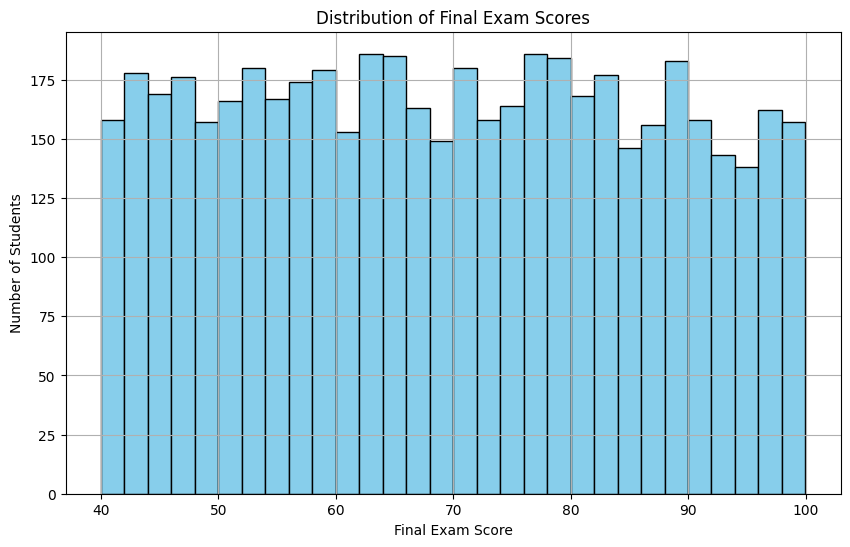

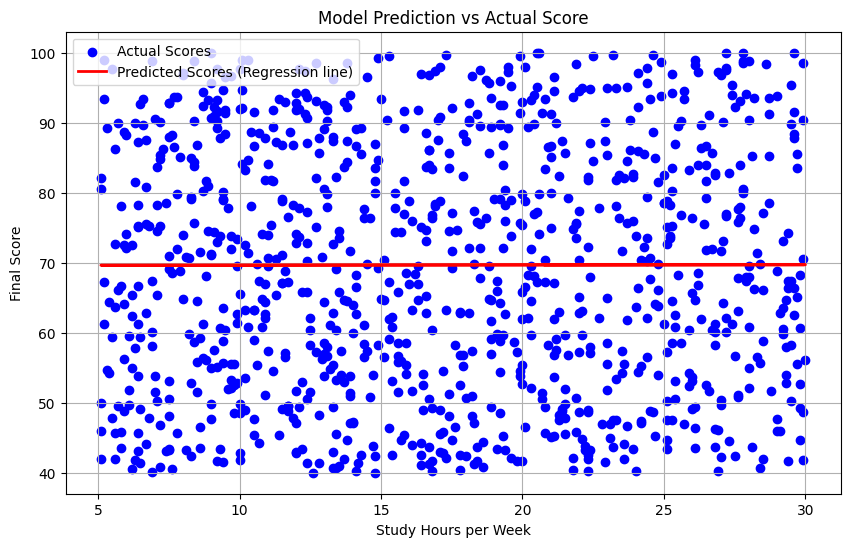

Predicted Final Score for 9 Study Hours: 69.65


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv("/content/Students Performance Dataset.csv")

# Input & Output
X = data[['Study_Hours_per_Week']]
y = data[['Final_Score']]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance Evaluation on Test Data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("Model Performance on Test Data:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


# Histogram
plt.figure(figsize=(10,6))
plt.hist(data["Final_Score"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Exam Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

# Scatter + Regression Line
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Scores (Regression line)")
plt.title("Model Prediction vs Actual Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Score")
plt.legend()
plt.grid(True)
plt.show()

# Predict for new input
new_hours = 9
predicted_new_score = model.predict([[new_hours]])
print(f"Predicted Final Score for {new_hours} Study Hours: {predicted_new_score[0][0]:.2f}")